Import Library

In [1]:
import pandas as pd

Membaca dan Menampilkan Data

In [2]:
pd.set_option('display.max_column', 20)

#Unggah dataset yang disimpan dalam sebuah file Excel
df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')

#Periksa sampel dari dataset dengan menjalankan perintah df.head()
print(df.head())

  kode_kontrak  pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0   AGR-000001                      295        YA                     48   
1   AGR-000011                      271        YA                     36   
2   AGR-000030                      159     TIDAK                     12   
3   AGR-000043                      210        YA                     12   
4   AGR-000049                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  


Drop Kolom dan Melihat Relasi Antar Data

In [3]:
#Hapus kolom kode_kontrak dari dataframe
df.drop(['kode_kontrak'], axis=1, inplace=True)

In [4]:
#Periksa relasi antara kolom 'rata_rata_overdue' dan 'risk_rating'
print('melihat data unique pada kolom rata_rata_overdue:')
print(df['rata_rata_overdue'].unique())
print()
print('melihat data unique pada kolom risk_rating:')
print(df['risk_rating'].unique())
print()
print('membandingkan data pada kolom rata_rata_overdue dan risk_rating:')
print(df[['rata_rata_overdue','risk_rating']])

melihat data unique pada kolom rata_rata_overdue:
['61 - 90 days' '0 - 30 days' '46 - 60 days' '31 - 45 days' '> 90 days']

melihat data unique pada kolom risk_rating:
[4 1 3 2 5]

membandingkan data pada kolom rata_rata_overdue dan risk_rating:
    rata_rata_overdue  risk_rating
0        61 - 90 days            4
1        61 - 90 days            4
2         0 - 30 days            1
3        46 - 60 days            3
4        31 - 45 days            2
..                ...          ...
895         > 90 days            5
896      46 - 60 days            3
897       0 - 30 days            1
898      31 - 45 days            2
899       0 - 30 days            1

[900 rows x 2 columns]


Menghapus Kolom 'rata_rata_overdue'

In [5]:
#Hapus kolom rata_rata_overdue dari dataframe
df.drop(['rata_rata_overdue'], axis=1, inplace=True)

In [6]:
#Memeriksa jumlah data pada setiap kelas
print(df['risk_rating'].value_counts())

risk_rating
3    291
1    227
2    159
4    120
5    103
Name: count, dtype: int64


Memeriksa Data

In [7]:
#Periksa struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pendapatan_setahun_juta  900 non-null    int64 
 1   kpr_aktif                900 non-null    object
 2   durasi_pinjaman_bulan    900 non-null    int64 
 3   jumlah_tanggungan        900 non-null    int64 
 4   risk_rating              900 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 35.3+ KB


In [8]:
#Periksa data unique pada kolom kpr_aktif
print('\nData unik pada kpr_aktif:', df['kpr_aktif'].unique())


Data unik pada kpr_aktif: ['YA' 'TIDAK']


In [9]:
#Periksa tipe data pada kolom kpr_aktif
print('\nTipe Data:', type(df['kpr_aktif'].iloc[1]))


Tipe Data: <class 'str'>


Konversi Tipe Data String ke Boolean

In [10]:
#Konversi tipe data 'kpr_aktif' dari tipe string menjadi boolean
df.loc[(df['kpr_aktif']=='YA'), 'kpr_aktif'] = True
df.loc[(df['kpr_aktif']=='Tidak'), 'kpr_aktif'] = False
df['kpr_aktif'] = df['kpr_aktif'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   pendapatan_setahun_juta  900 non-null    int64
 1   kpr_aktif                900 non-null    bool 
 2   durasi_pinjaman_bulan    900 non-null    int64
 3   jumlah_tanggungan        900 non-null    int64
 4   risk_rating              900 non-null    int64
dtypes: bool(1), int64(4)
memory usage: 29.1 KB


Pembagian Dataset Training dan Testing

In [11]:
#Membagi kolom menjadi variabel fitur dan variabel target
feature_cols = ['pendapatan_setahun_juta', 'kpr_aktif', 'durasi_pinjaman_bulan', 'jumlah_tanggungan']
# Variabel fitur
X = df[feature_cols]
# Variabel target
y = df['risk_rating']

#Bagi dataset menjadi training (60%) dan testing set (40%) dan seed untuk random number=42 (seed boleh bebas dipilih)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#Cek ukuran training set dan testing set
print('Ukuran training set:', X_train.shape)
print('Ukuran testing set :', X_test.shape)

Ukuran training set: (540, 4)
Ukuran testing set : (360, 4)


Cek Porsi Data Training dan Testing

In [12]:
#Cek porsi tiap kelas pada data training dan data testing
print('Porsi tiap kelas pada data training:')
print(y_train.value_counts(normalize=True) * 100)
print('\nPorsi tiap kelas pada data testing:')

Porsi tiap kelas pada data training:
risk_rating
3    32.407407
1    25.000000
2    17.222222
4    13.703704
5    11.666667
Name: proportion, dtype: float64

Porsi tiap kelas pada data testing:


Inisialisasi dan Pelatihan Model

In [13]:
#Melakukan import library DecisionTreeClassifier dari paket sklearn.tree
from sklearn.tree import DecisionTreeClassifier

#Buat sebuah Decision Tree Classifier dengan metode gini impurity index, kedalaman pohon = 4 dan seed bilangan acak = 42
#Lakukan fitting model DTS dengan menggunakan training data
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

#Melakukan fitting model dengan dataset training
clf.fit(X_train, y_train)
print(clf)

DecisionTreeClassifier(max_depth=4, random_state=42)


Visualisasi Model

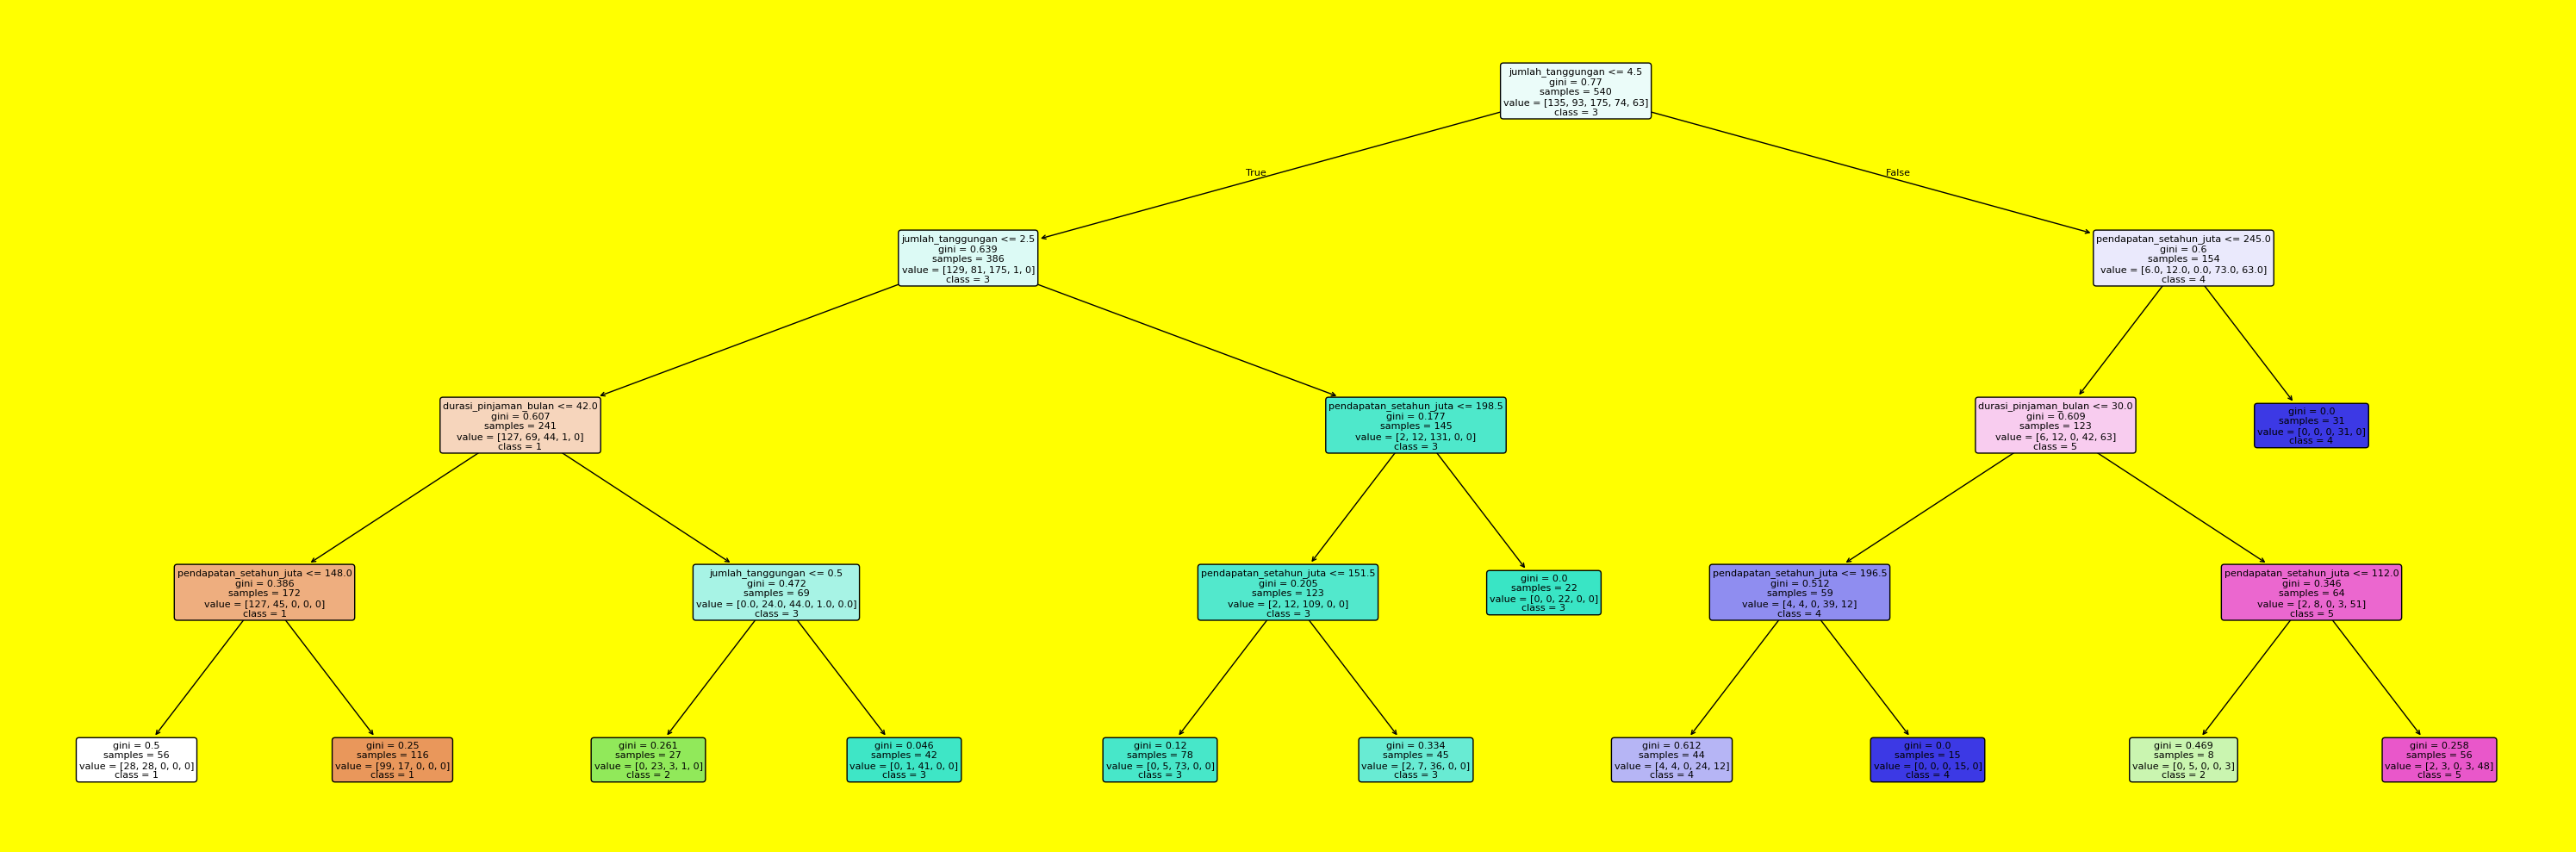

In [15]:
#Melakukan labeling pada Decision Tree
feature_names = X.columns
labels = list(y.unique())
labels.sort()
labels = [str(x) for x in labels]

#Visualisasi Decision Tree Classifier menggunakan library 'tree' impor paket yang dibutuhkan
from sklearn import tree
import matplotlib.pyplot as plt

#plot gambar dan atur warna latar
plt.figure(figsize=(30,10), facecolor ='yellow')

#Buat diagram pohon
tree.plot_tree(clf, feature_names=feature_names, class_names=labels, rounded=True, filled=True, fontsize=8)

#Apabila gambar pohon yang dihasilkan tidak jelas, gambar tersebut dapat disimpan dengan resolusi tinggi ke dalam bentuk JPEG, PNG, dsb. Gambar dapat dilihat pada file yang telah disimpan
#plt.savefig("nama_file.png", dpi=100)

#Tampilkan gambar
plt.tight_layout()
plt.show()

In [16]:
#Visualisasi Decision Tree menggunakan text
#import relevant functions
from sklearn.tree import export_text

#export the decision rules
tree_rules = export_text(clf, feature_names=list(X.columns))

#print the result
print(tree_rules)

|--- jumlah_tanggungan <= 4.50
|   |--- jumlah_tanggungan <= 2.50
|   |   |--- durasi_pinjaman_bulan <= 42.00
|   |   |   |--- pendapatan_setahun_juta <= 148.00
|   |   |   |   |--- class: 1
|   |   |   |--- pendapatan_setahun_juta >  148.00
|   |   |   |   |--- class: 1
|   |   |--- durasi_pinjaman_bulan >  42.00
|   |   |   |--- jumlah_tanggungan <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- jumlah_tanggungan >  0.50
|   |   |   |   |--- class: 3
|   |--- jumlah_tanggungan >  2.50
|   |   |--- pendapatan_setahun_juta <= 198.50
|   |   |   |--- pendapatan_setahun_juta <= 151.50
|   |   |   |   |--- class: 3
|   |   |   |--- pendapatan_setahun_juta >  151.50
|   |   |   |   |--- class: 3
|   |   |--- pendapatan_setahun_juta >  198.50
|   |   |   |--- class: 3
|--- jumlah_tanggungan >  4.50
|   |--- pendapatan_setahun_juta <= 245.00
|   |   |--- durasi_pinjaman_bulan <= 30.00
|   |   |   |--- pendapatan_setahun_juta <= 196.50
|   |   |   |   |--- class: 4
|   |   |   |--- penda

Evaluasi Model

In [17]:
#Lakukan prediksi dataset training menggunakan model yang telah dibangun
from sklearn import metrics
train_pred = clf.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train, train_pred)
print('Akurasi training dataset:', train_accuracy)

#Lakukan prediksi dataset testing menggunakan model yang telah dibangun
test_pred = clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, test_pred)
print('Akurasi testing dataset :', test_accuracy)


Akurasi training dataset: 0.8240740740740741
Akurasi testing dataset : 0.7805555555555556


Hyperparameter Tuning

In [18]:
#Impor fungsi GridSearchCV
from sklearn.model_selection import GridSearchCV

#Tentukan nilai parameter max_depth yang akan diuji
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8,9,10]}]

#Tentukan kriteria penilaian menggunakan nilai F1
print('\nTuning hyperparameters untuk F1-score\n')

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

print('Hasil nilai uji saat melakukan tuning:')
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f'{mean:0.3f} (+/-{std*2:0.03f}) for {params}')

#Parameter terbaik yang ditemukan
print('\nParameter terbaik yang ditemukan:')
print(clf.best_params_)

#Model dengan parameter terbaik yang ditemukan
best_model = clf.best_estimator_

#Lakukan prediksi dataset training dan dataset testing menggunakan model dengan parameter terbaik
train_pred = best_model.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train, train_pred)
test_pred = best_model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

print('\nAkurasi training dataset:', train_accuracy)
print('Akurasi testing dataset :', test_accuracy)



Tuning hyperparameters untuk F1-score

Hasil nilai uji saat melakukan tuning:
0.253 (+/-0.006) for {'max_depth': 1}
0.539 (+/-0.025) for {'max_depth': 2}
0.676 (+/-0.053) for {'max_depth': 3}
0.745 (+/-0.112) for {'max_depth': 4}
0.756 (+/-0.092) for {'max_depth': 5}
0.769 (+/-0.128) for {'max_depth': 6}
0.768 (+/-0.110) for {'max_depth': 7}
0.750 (+/-0.123) for {'max_depth': 8}
0.734 (+/-0.148) for {'max_depth': 9}
0.713 (+/-0.087) for {'max_depth': 10}

Parameter terbaik yang ditemukan:
{'max_depth': 6}

Akurasi training dataset: 0.8629629629629629
Akurasi testing dataset : 0.7666666666666667
